In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu từ tệp CSV
file_path = "/kaggle/input/body-performance-data/bodyPerformance.csv"
df = pd.read_csv(file_path)

# Xem thông tin tổng quan về dữ liệu
df.info()
#print(df.head())
#print(df.tail())
# Tính toán thống kê mô tả cho các cột số
df.describe().round(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.0000,13393.0000,13393.0000,13393.0000,13393.0000,13393.0000,13393.0000,13393.0000,13393.0000,13393.0000
mean,36.7751,168.5598,67.4473,23.2402,78.7968,130.2348,36.9639,15.2093,39.7712,190.1296
std,13.6256,8.4266,11.9497,7.2568,10.7420,14.7140,10.6249,8.4567,14.2767,39.8680
min,21.0000,125.0000,26.3000,3.0000,0.0000,0.0000,0.0000,-25.0000,0.0000,0.0000
25%,25.0000,162.4000,58.2000,18.0000,71.0000,120.0000,27.5000,10.9000,30.0000,162.0000
50%,32.0000,169.2000,67.4000,22.8000,79.0000,130.0000,37.9000,16.2000,41.0000,193.0000
75%,48.0000,174.8000,75.3000,28.0000,86.0000,141.0000,45.2000,20.7000,50.0000,221.0000
max,64.0000,193.8000,138.1000,78.4000,156.2000,201.0000,70.5000,213.0000,80.0000,303.0000


In [3]:
# Checking for Missing Values
missing_values = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values)
if missing_values.sum() == 0:
    print("=> No missing values found in the dataset.")
else:
    print("=> Missing values detected! Handling is required.")

#Xử lý dữ liệu mất mát (nếu có)
if df.isnull().values.any():
    # Với dữ liệu số, có thể điền bằng giá trị trung bình
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mean())

    # Với dữ liệu phân loại, có thể điền bằng giá trị phổ biến nhất
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])


Number of missing values per column:
age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64
=> No missing values found in the dataset.


In [4]:
# Columns that logically shouldn't be zero in this context
cols_to_check_zero = ['diastolic', 'systolic', 'gripForce', 'broad jump_cm']
print(f"Checking for zero values in columns: {cols_to_check_zero}")
initial_rows = df.shape[0]
# Keep rows where ALL specified columns are greater than 0
df_cleaned = df[(df[cols_to_check_zero] > 0).all(axis=1)].copy() # Use .copy() to avoid SettingWithCopyWarning
rows_after_cleaning = df_cleaned.shape[0]
print(f"Dataset size before removing zero values: {initial_rows} rows")
print(f"Dataset size after removing zero values: {rows_after_cleaning} rows")
print(f"Number of rows removed: {initial_rows - rows_after_cleaning}")
# Update the dataframe
df = df_cleaned


# Các cột cần làm sạch (loại bỏ giá trị = 0)
#columns_to_clean = ["diastolic", "systolic", "gripForce", "broad jump_cm"]

# Lọc bỏ các dòng có giá trị bằng 0
#df_cleaned = df[(df[columns_to_clean] > 0).all(axis=1)]

# Lưu lại dữ liệu sạch
#df_cleaned.to_csv("bodyPerformance_cleaned.csv", index=False)

#print("Dữ liệu đã được làm sạch và lưu vào bodyPerformance_cleaned.csv")


Checking for zero values in columns: ['diastolic', 'systolic', 'gripForce', 'broad jump_cm']
Dataset size before removing zero values: 13393 rows
Dataset size after removing zero values: 13379 rows
Number of rows removed: 14


In [5]:
#Thống kê dữ liệu mẫu sau khi xử lý giá trị không hợp lệ, lỗi
numerical_cols_eda = df.select_dtypes(include=np.number).columns
df[numerical_cols_eda].describe().round(4)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000
mean,36.7673,168.5640,67.4489,23.2344,78.8041,130.2443,36.9804,15.2106,39.7880,190.2713
std,13.6218,8.4261,11.9469,7.2511,10.7194,14.6718,10.6059,8.4570,14.2581,39.5390
min,21.0000,125.0000,26.3000,3.0000,6.0000,14.0000,1.6000,-25.0000,0.0000,20.0000
25%,25.0000,162.4000,58.2000,18.0000,71.0000,120.0000,27.5000,10.9000,30.0000,162.0000
50%,32.0000,169.2000,67.4400,22.8000,79.0000,130.0000,37.9000,16.2000,41.0000,193.0000
75%,48.0000,174.8000,75.3000,28.0000,86.0000,141.0000,45.2000,20.7500,50.0000,221.0000
max,64.0000,193.8000,138.1000,78.4000,156.2000,201.0000,70.5000,213.0000,80.0000,303.0000


In [6]:
# Use the same numerical columns identified for EDA
cols_to_handle_outliers = numerical_cols_eda[:] # Create a copy

for col in cols_to_handle_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before capping (optional, for reporting)
    outliers_lower = df[df[col] < lower_bound].shape[0]
    outliers_upper = df[df[col] > upper_bound].shape[0]
    if outliers_lower > 0 or outliers_upper > 0:
        print(f"  Column '{col}':")
        print(f"    IQR={IQR:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}")
        print(f"    Found {outliers_lower} outliers below lower bound and {outliers_upper} outliers above upper bound.")
        df[col] = np.clip(df[col], lower_bound, upper_bound) # Apply capping
    else:
         print(f"  Column '{col}': No outliers detected based on 1.5*IQR rule.")

  Column 'age': No outliers detected based on 1.5*IQR rule.
  Column 'height_cm':
    IQR=12.40, Lower Bound=143.80, Upper Bound=193.40
    Found 9 outliers below lower bound and 1 outliers above upper bound.
  Column 'weight_kg':
    IQR=17.10, Lower Bound=32.55, Upper Bound=100.95
    Found 2 outliers below lower bound and 81 outliers above upper bound.
  Column 'body fat_%':
    IQR=10.00, Lower Bound=3.00, Upper Bound=43.00
    Found 0 outliers below lower bound and 76 outliers above upper bound.
  Column 'diastolic':
    IQR=15.00, Lower Bound=48.50, Upper Bound=108.50
    Found 35 outliers below lower bound and 17 outliers above upper bound.
  Column 'systolic':
    IQR=21.00, Lower Bound=88.50, Upper Bound=172.50
    Found 10 outliers below lower bound and 18 outliers above upper bound.
  Column 'gripForce': No outliers detected based on 1.5*IQR rule.
  Column 'sit and bend forward_cm':
    IQR=9.85, Lower Bound=-3.87, Upper Bound=35.52
    Found 398 outliers below lower bound a

In [7]:
df['height_m'] = df['height_cm'] / 100 # Convert height from cm to m
df['BMI'] = df['weight_kg'] / (df['height_m'] ** 2) # Calculate BMI
# df.drop('height_m', axis=1, inplace=True)
print("BMI feature created.")
df['BMI'].describe()

BMI feature created.


count    13379.000000
mean        23.591934
std          2.896895
min         11.314973
25%         21.612812
50%         23.462706
75%         25.334523
max         41.250744
Name: BMI, dtype: float64

Intermediate column 'height_m' has been dropped.


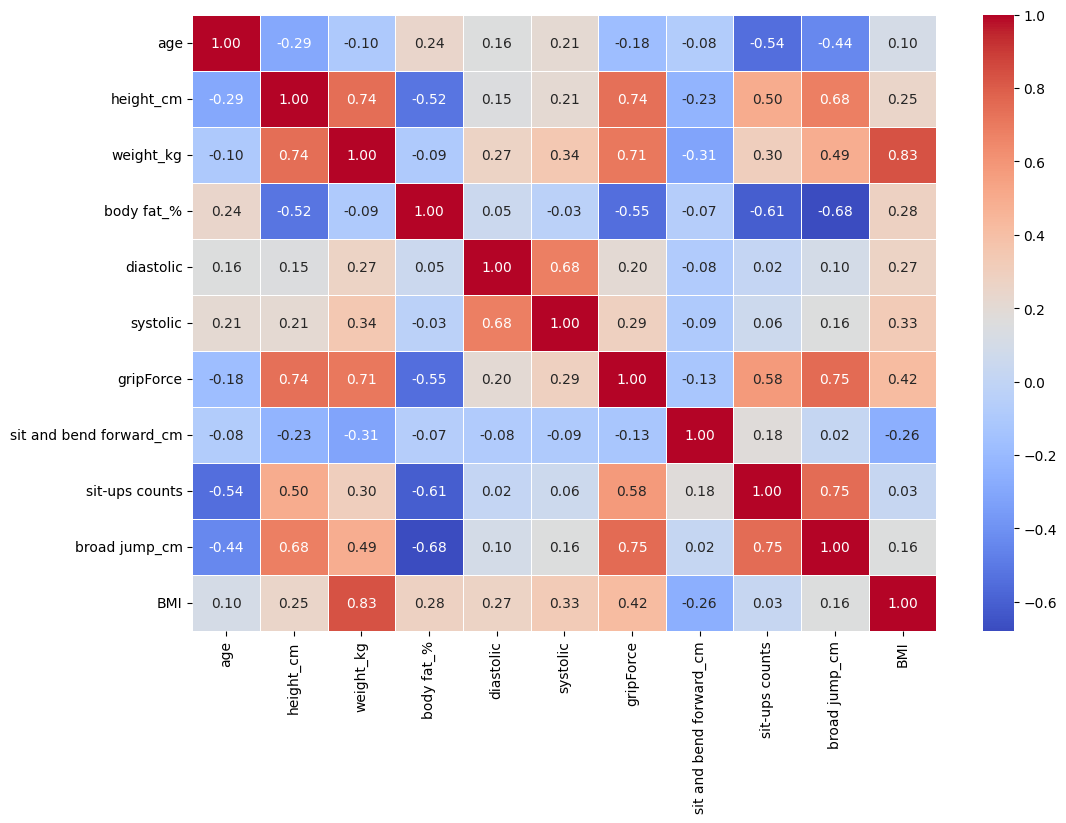

In [8]:
# --- Drop the intermediate 'height_m' column ---
if 'height_m' in df.columns:
        df = df.drop('height_m', axis=1) # Using Cách 1
        #Hoặc: df.drop('height_m', axis=1, inplace=True) # Using Cách 2
        print("Intermediate column 'height_m' has been dropped.")
else:
  print("Column 'height_m' was not found to be dropped (might have been dropped already).")

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [9]:
if 'gender' in df.columns:
    gender_mapping = {'M': 1, 'F': 0}
    df['gender'] = df['gender'].map(gender_mapping)
    print("Encoded 'gender' column. Value counts after encoding:")
    print(df['gender'].value_counts())
else:
    print("Column 'gender' not found for encoding.")

Encoded 'gender' column. Value counts after encoding:
gender
1    8462
0    4917
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import MinMaxScaler
# Identify numerical columns again, including BMI if created, excluding target/non-features
numerical_cols_final = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude_scaling = ['class'] # Target variable

cols_to_scale = [col for col in numerical_cols_final if col not in cols_to_exclude_scaling and col in df.columns]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[cols_to_scale])
df_scaled = pd.DataFrame(scaled_data, columns=cols_to_scale, index=df.index)
df[cols_to_scale] = df_scaled
print("Data after scaling:")
df[cols_to_scale].describe().round(4)

Data after scaling:


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,BMI
count,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000,13379.0000
mean,0.3667,0.6325,0.4993,0.5096,0.5054,0.5052,0.4969,0.5135,0.4877,0.4973,0.5090,0.4101
std,0.3168,0.4821,0.1697,0.1725,0.1797,0.1769,0.1734,0.1539,0.1953,0.1782,0.1716,0.0968
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0930,0.0000,0.3750,0.3750,0.3750,0.3750,0.3750,0.3759,0.3750,0.3750,0.3856,0.3440
50%,0.2558,1.0000,0.5121,0.5101,0.4950,0.5083,0.4940,0.5269,0.5095,0.5125,0.5207,0.4058
75%,0.6279,1.0000,0.6250,0.6250,0.6250,0.6250,0.6250,0.6328,0.6250,0.6250,0.6427,0.4683
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [11]:
from sklearn.model_selection import train_test_split

# Assuming df_final is the fully preprocessed DataFrame
# Separate features and target
X = df.drop(columns=["class"], axis=1)
y = df["class"]

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     # 20% for testing
    random_state=42,   # For reproducibility
    stratify=y         # Maintain class proportions
)

# Check the shapes of the resulting datasets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)

# Verify class proportions in train and test sets
# Optional: Verify class proportions in train and test sets
print("\nClass distribution in training set (y_train):\n", y_train.value_counts(normalize=True).round(2))
print("\nClass distribution in testing set (y_test):\n", y_test.value_counts(normalize=True).round(2))

Training set shape (X_train): (10703, 12)
Testing set shape (X_test): (2676, 12)
Training labels shape (y_train): (10703,)
Testing labels shape (y_test): (2676,)

Class distribution in training set (y_train):
 class
A    0.25
B    0.25
C    0.25
D    0.25
Name: proportion, dtype: float64

Class distribution in testing set (y_test):
 class
A    0.25
C    0.25
B    0.25
D    0.25
Name: proportion, dtype: float64


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Giả sử bạn đã có X_train, y_train, X_test, y_test

def perform_grid_search(estimator, param_grid, X_train, y_train, X_test, y_test, cv=5, scoring='f1_macro'):
    """
    Hàm thực hiện GridSearchCV cho một mô hình cụ thể và đánh giá nó.

    Args:
        estimator: Đối tượng mô hình scikit-learn (ví dụ: LogisticRegression()).
        param_grid: Dict chứa lưới siêu tham số để tìm kiếm.
        X_train, y_train: Dữ liệu huấn luyện.
        X_test, y_test: Dữ liệu kiểm tra.
        cv: Số fold cho cross-validation.
        scoring: Chỉ số đánh giá để tối ưu.

    Returns:
        best_estimator: Mô hình tốt nhất đã được huấn luyện lại.
        best_params: Bộ siêu tham số tốt nhất.
        best_score: Điểm số tốt nhất trên tập validation (cross-validated).
        test_accuracy: Độ chính xác trên tập kiểm tra.
        test_classification_report: Báo cáo phân loại trên tập kiểm tra.
    """
    print(f"--- Bắt đầu GridSearchCV cho {estimator.__class__.__name__} ---")

    grid_search = GridSearchCV(estimator=estimator,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               verbose=1, # Hiển thị thông tin
                               n_jobs=-1) # Sử dụng tất cả CPU cores

    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score_cv = grid_search.best_score_ # Điểm trên tập validation (CV)

    results_df = pd.DataFrame(grid_search.cv_results_)
    print(results_df)

    # Nếu muốn xem các cột cụ thể
    print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])
    # print(f"\nSiêu tham số tốt nhất: {best_params}")
    # print(f"Điểm {scoring} tốt nhất (CV): {best_score_cv:.4f}")

    # Đánh giá mô hình tốt nhất trên tập Test
    y_pred_test = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_classification_report = classification_report(y_test, y_pred_test, target_names=['A', 'B', 'C', 'D'], digits=4) # Điều chỉnh target_names nếu cần

    # print(f"\nĐộ chính xác trên tập kiểm tra: {test_accuracy:.4f}")
    # print(f"Báo cáo phân loại trên tập kiểm tra:\n{test_classification_report}")
    # print(f"--- Hoàn thành GridSearchCV cho {estimator.__class__.__name__} ---\n")

    return best_estimator, best_params, best_score_cv, test_accuracy, test_classification_report

In [13]:
# 1. Logistic Regression
# One-vs-Rest hoặc Soft Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000) # Giữ max_iter
lr_param_grid = {
    'solver': ['lbfgs'], # 'liblinear' chỉ OvR
    'penalty': ['l2'], # 'l1' chỉ với 'saga' hoặc 'liblinear'
    'C':  [50],
    'multi_class': ['multinomial'], # 'multinomial' không với 'liblinear'
}

In [14]:
# 2. SVM
# Linear kernel, RBF kernel, Polynomial kernel, Sigmoid kernel
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
# (Để chính xác hơn, bạn nên tạo các lưới riêng nếu kernel thay đổi các tham số cần thiết)
# Ví dụ, GridSearchCV có thể xử lý điều này nếu bạn dùng list of dicts cho param_grid
svm_param_grid_conditional = [
    {'kernel': ['poly'], 'C': [ 10], 'gamma': ['scale']},
]

In [15]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_split': [4],
    'min_samples_leaf': [3],
    'max_features':[None]
}

In [16]:
# 4. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap = True)
rf_param_grid = {
    'n_estimators': [300],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': [None]
}

In [17]:
# 5. KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_param_grid = {
    'n_neighbors': [35],
    'weights': ['distance'],
    'metric': ['minkowski'],
    'p':[1]
}

In [18]:
# 6. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_param_grid = { # Thường ít siêu tham số cần tune
    'var_smoothing': [1e-10]
}

In [19]:
# 7. Gradient Boosting (Scikit-learn's)
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    'n_estimators': [200],
    'max_depth': [7],
    'max_features': [None]
}

In [20]:
# 8. AdaBoost Classifier (Thay thế cho MLP)
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 4, min_samples_split= 3
),random_state=42)
ada_param_grid = {
    'n_estimators': [150],
    'learning_rate': [0.1],
    'algorithm': ['SAMME']
}

In [21]:

# (The rest of your code for defining models and param_grids remains the same)

# --- Thực hiện GridSearchCV cho từng mô hình ---
models_to_tune = [
    (lr_model, lr_param_grid, "Logistic Regression"), # Sử dụng lưới đơn giản hơn
    (svm_model, svm_param_grid_conditional, "Support Vector Machine"), # Sử dụng lưới có điều kiện
    (dt_model, dt_param_grid, "Decision Tree"), # uncommented for example
    (rf_model, rf_param_grid, "Random Forest"),
    (knn_model, knn_param_grid, "K-Nearest Neighbors"),
    (gnb_model, gnb_param_grid, "Gaussian Naive Bayes"),
    (gb_model, gb_param_grid, "Gradient Boosting"),
    (ada_model, ada_param_grid, "AdaBoost Classifier")
]

results = {} # Để lưu kết quả

for model, param_grid, model_name in models_to_tune:
    best_est, best_p, best_s_cv, test_acc, test_report = perform_grid_search(
        model, param_grid, X_train, y_train, X_test, y_test, cv=5 # Giảm cv để chạy nhanh hơn
    )
    results[model_name] = {
        'best_estimator': best_est,
        'best_params': best_p,
        'best_cv_score (f1_macro)': best_s_cv,
        'test_accuracy': test_acc,
        'test_classification_report': test_report
    }

# --- In kết quả tóm tắt ---
print("\n\n=== KẾT QUẢ GRIDSEARCHCV TÓM TẮT ===")
for model_name, res in results.items():
    print(f"\n--- {model_name} ---")
    print(f"Siêu tham số tốt nhất: {res['best_params']}")
    print(f"Điểm F1-macro tốt nhất (CV): {res['best_cv_score (f1_macro)']:.4f}")
    print(f"Độ chính xác trên tập kiểm tra: {res['test_accuracy']:.4f}")
    # Assuming test_classification_report is already a formatted string
    print(f"Báo cáo phân loại trên tập kiểm tra:\n{res['test_classification_report']}")


--- Bắt đầu GridSearchCV cho LogisticRegression ---
Fitting 5 folds for each of 1 candidates, totalling 5 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.095901      0.125698         0.019254        0.006475      50   

  param_multi_class param_penalty param_solver  \
0       multinomial            l2        lbfgs   

                                              params  split0_test_score  \
0  {'C': 50, 'multi_class': 'multinomial', 'penal...            0.61965   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.604902           0.623947           0.615327           0.608735   

   mean_test_score  std_test_score  rank_test_score  
0         0.614512        0.006954                1  
                                              params  mean_test_score  \
0  {'C': 50, 'multi_class': 'multinomial', 'penal...         0.614512   

   std_test_score  rank_test_score  
0        0.006954              

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/en

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        15.6451      2.328108         0.152863        0.032161   

  param_algorithm param_learning_rate param_n_estimators  \
0           SAMME                 0.1                150   

                                              params  split0_test_score  \
0  {'algorithm': 'SAMME', 'learning_rate': 0.1, '...           0.744224   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.718866           0.748419           0.742258           0.727031   

   mean_test_score  std_test_score  rank_test_score  
0          0.73616        0.011269                1  
                                              params  mean_test_score  \
0  {'algorithm': 'SAMME', 'learning_rate': 0.1, '...          0.73616   

   std_test_score  rank_test_score  
0        0.011269                1  


=== KẾT QUẢ GRIDSEARCHCV TÓM TẮT ===

--- Logistic Regression ---
Siêu tham số tốt nhất: {'C': 50, 

In [22]:
import pandas as pd

# Tạo danh sách các bản ghi từ dictionary `results`
summary_records = []
for model_name, res in results.items():
    summary_records.append({
        'Model': model_name,
        'Best Params': res['best_params'],
        'Best CV F1 (macro)': res['best_cv_score (f1_macro)'],
        'Test Accuracy': res['test_accuracy'],
        'Classification Report': res['test_classification_report']
    })

# Chuyển thành DataFrame
results_df = pd.DataFrame(summary_records)

# Lưu ra file CSV
results_df.to_csv('results_summary.csv', index=False)
print("\n📁 Đã lưu kết quả tóm tắt ra file: results_summary.csv")



📁 Đã lưu kết quả tóm tắt ra file: results_summary.csv
